In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import calendar
from matplotlib.pyplot import figure
import pymongo
from pymongo import MongoClient
import numpy as np
import math
from datetime import datetime
import statistics
from math import sqrt
from numpy import log as ln
from sklearn.neighbors import KNeighborsRegressor as knr
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.metrics import roc_auc_score
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('products.csv')

In [3]:
df['Popularity'] = 0

In [4]:
df

,Category,Sub-Category,Sub-Sub-Category,Year,Month,Day,Date,Label,Week_Day,Popularity
0,Watches Sunglasses Jewellery,Watches,Women,2023,1,6,2023-01-06 00:00:00,0.023574,Friday,0
1,Bags and Travel,Women Bags,Cross Body & Shoulder Bags,2022,11,26,2022-11-26 00:00:00,0.036782,Saturday,0
2,Bedding & Bath,Bath,Bath Mats,2022,11,26,2022-11-26 00:00:00,0.029219,Saturday,0
3,Bedding & Bath,Bath,Bath Towels,2022,11,26,2022-11-26 00:00:00,0.035893,Saturday,0
4,Bedding & Bath,Bath,Bathroom Scales,2022,11,26,2022-11-26 00:00:00,0.032787,Saturday,0
...,...,...,...,...,...,...,...,...,...,...
9708,Watches Sunglasses Jewellery,Eyewear,Sunglasses,2023,1,6,2023-01-06 00:00:00,0.023057,Friday,0
9709,Watches Sunglasses Jewellery,Jewellery,Men,2023,1,6,2023-01-06 00:00:00,0.023069,Friday,0
9710,Watches Sunglasses Jewellery,Jewellery,Women,2023,1,6,2023-01-06 00:00:00,0.024267,Friday,0
9711,Watches Sunglasses Jewellery,Watches,Kids,2023,1,6,2023-01-06 00:00:00,0.024054,Friday,0


In [5]:
x_train = []
x_test = []
y_train = []
y_test = []

In [6]:
df['New Cat'] = df['Category'] + '/' + df['Sub-Category'] + '/' + df['Sub-Sub-Category']

In [7]:

x_train_df = pd.DataFrame(columns=['Category',	'Sub-Category',	'Sub-Sub-Category',	'Year',	'Month',	'Day',	'Week_Day'])
x_test_df = pd.DataFrame(columns=['Category',	'Sub-Category',	'Sub-Sub-Category',	'Year',	'Month',	'Day',	'Week_Day'])
y_train_df = pd.DataFrame(columns=['Label'])
y_test_df = pd.DataFrame(columns=['Label'])

In [8]:
#X_train(all columns except New Cat, Date, Label)
#Y_train(Label)
for i in df['New Cat'].unique():
    temp2 = df[df['New Cat'] == i]
    x_train.append(temp2.drop(['New Cat', 'Date', 'Label'], axis=1)[0:int(len(temp2) * 0.8)])

    x_test.append(temp2.drop(['New Cat', 'Date', 'Label'], axis=1)[int(len(temp2) * 0.8):])
    y_train.append(temp2['Label'][0:int(len(temp2) * 0.8)].to_frame(name="Label"))

    y_test.append(temp2['Label'][int(len(temp2) * 0.8):].to_frame(name="Label"))


In [9]:
for i in x_train:
    x_train_df = x_train_df.append(i)

for i in x_test:
    x_test_df = x_test_df.append(i)

for i in y_train:
    y_train_df = y_train_df.append(i)

for i in y_test:
    y_test_df = y_test_df.append(i)


In [10]:
le = preprocessing.LabelEncoder()
x_train_df["Category"] = le.fit_transform(x_train_df["Category"])
x_train_df["Sub-Category"] = le.fit_transform(x_train_df["Sub-Category"])
x_train_df["Sub-Sub-Category"] = le.fit_transform(x_train_df["Sub-Sub-Category"])
#df["Day"] = le.fit_transform(df["Day"])
x_train_df["Week_Day"] = le.fit_transform(x_train_df["Week_Day"])

x_test_df["Category"] = le.fit_transform(x_test_df["Category"])
x_test_df["Sub-Category"] = le.fit_transform(x_test_df["Sub-Category"])
x_test_df["Sub-Sub-Category"] = le.fit_transform(x_test_df["Sub-Sub-Category"])
#df["Day"] = le.fit_transform(df["Day"])
x_test_df["Week_Day"] = le.fit_transform(x_test_df["Week_Day"])

x_test_df = x_test_df.sort_index()
x_train_df = x_train_df.sort_index()

In [11]:
regressor = DecisionTreeRegressor
#xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.80, random_state = 0)




In [12]:
model = regressor()
model.fit(x_train_df, y_train_df)

DecisionTreeRegressor()

In [13]:
yhat = model.predict(x_test_df)


# Plotting only the first 100 values for simplicity of graph

In [18]:
yhat = yhat[:50]
y_test_df = y_test_df[:50]

In [19]:
x = []
for i in range(len(y_test_df)):
    x.append(i)

In [20]:
y_test_df

,Label
7459,0.029847
8051,0.028071
8649,0.024206
7471,0.027342
8063,0.027863
8661,0.025545
9156,0.024470
7476,0.028907
8068,0.024755
9161,0.023674


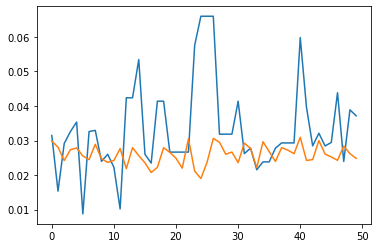

In [21]:
plt.plot(x, yhat)
plt.plot(x, y_test_df)
plt.show()